# Self study 4

In this self study we investigate some community detection (graph clustering) techniques.  We make extensive use of the Networkx package. The documentation can be found here: https://networkx.org/documentation/stable/reference/index.html

In [1]:
import numpy as np
import networkx as nx
import scipy as sp
import sklearn as skl
import matplotlib.pyplot as plt
import math
from sklearn.manifold import MDS


from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.quality import modularity

from sklearn.mixture import GaussianMixture

import itertools

C:\Users\inigo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


We are using a social network consisting of 71 lawyers. A description of the network and the original data can be found here:

https://www.stats.ox.ac.uk/~snijders/siena/Lazega_lawyers_data.htm

Of the three different relationships included in the data we will only be using the 'friendship' relation. This is a directed relationship, i.e., friends(a,b) does not necessarily imply friends(b,a) according to the data.

We load a version of the Lazega network data that only contains the 'friends' edges:

In [2]:
lazega=nx.readwrite.graphml.read_graphml('lazega.xml')

The nodes in the graph have the attributes "Practice" "Age" "Seniority" "Office" "Gender" "Status" . To obtain a dictionary with the values for a specified attribute for all nodes, we can use:

In [3]:
nx.get_node_attributes(lazega,'Office')

{'1': 1,
 '2': 1,
 '4': 1,
 '8': 1,
 '17': 1,
 '16': 1,
 '22': 1,
 '26': 1,
 '3': 2,
 '9': 1,
 '11': 1,
 '12': 1,
 '14': 2,
 '19': 1,
 '21': 1,
 '23': 1,
 '27': 1,
 '29': 1,
 '5': 2,
 '7': 2,
 '18': 2,
 '25': 2,
 '24': 1,
 '10': 1,
 '13': 1,
 '34': 1,
 '38': 1,
 '15': 3,
 '20': 1,
 '41': 1,
 '43': 1,
 '52': 1,
 '6': 2,
 '28': 2,
 '50': 2,
 '37': 3,
 '32': 2,
 '39': 1,
 '40': 1,
 '31': 2,
 '33': 2,
 '35': 2,
 '51': 2,
 '58': 2,
 '46': 2,
 '60': 1,
 '36': 1,
 '57': 1,
 '30': 2,
 '42': 1,
 '54': 1,
 '56': 1,
 '48': 1,
 '49': 1,
 '64': 1,
 '45': 1,
 '55': 1,
 '65': 1,
 '62': 1,
 '59': 2,
 '53': 1,
 '61': 1,
 '63': 2,
 '66': 1,
 '69': 1,
 '70': 1,
 '71': 1,
 '68': 1,
 '67': 1}

The following is a little helper function that returns an array of attribute values of nodes according to the order in which nodes are returned by the G.nodes() function

In [4]:
def get_att_array(G,att_name):
    ret_array=np.zeros(nx.number_of_nodes(G))
    for i,n in enumerate(G.nodes()):
        ret_array[i]=G.nodes[n][att_name]
    return(ret_array)

In [5]:
get_att_array(lazega,'Office')

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2., 2.,
       2., 3., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1.])

We can use this to plot the graph using one of the layout algorithms provided by networkx, and nodes colored according to one of the attributes:

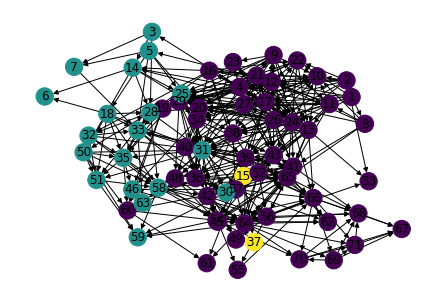

In [6]:
nx.draw_kamada_kawai(lazega,with_labels=True,node_color=get_att_array(lazega,'Office'))

To make things a bit simpler, we turn the directed graph into an undirected one:

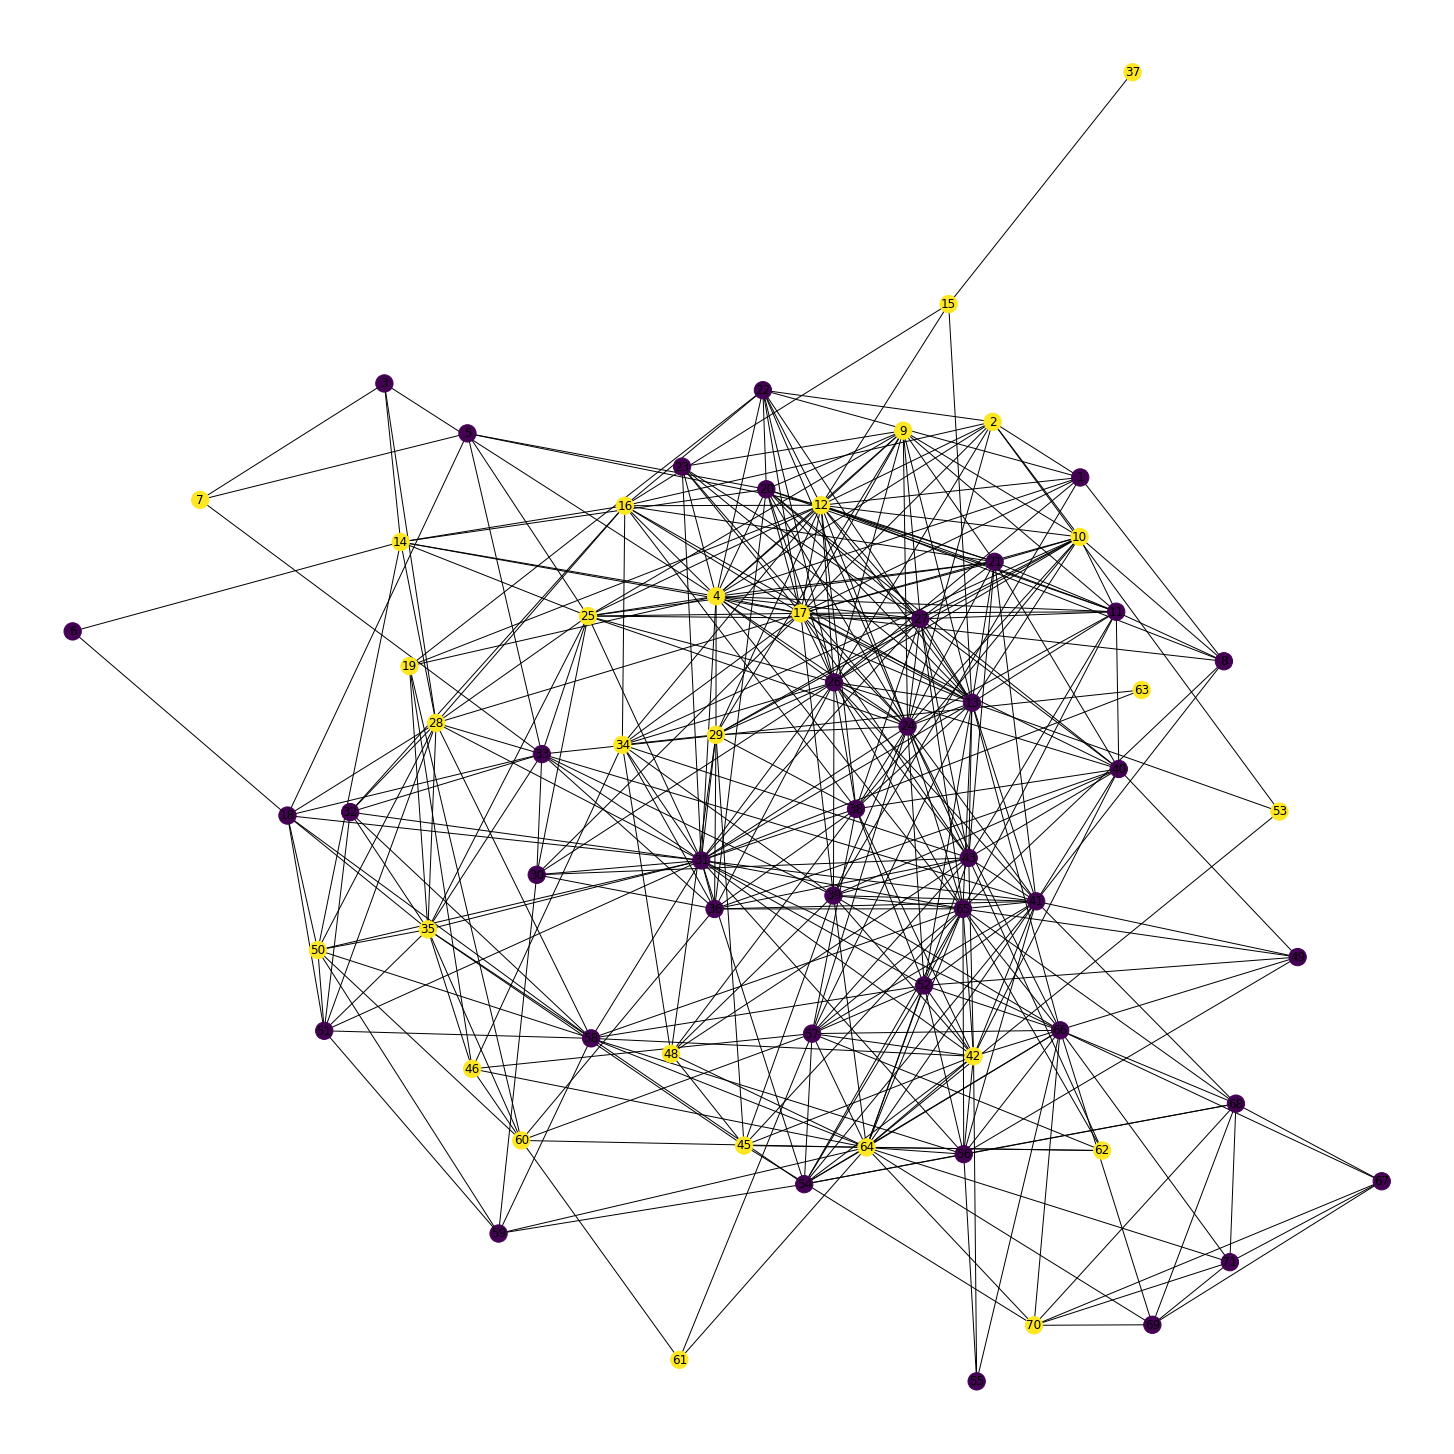

In [7]:
plt.figure(figsize=(20,20))
lazega=lazega.to_undirected()
nx.draw_kamada_kawai(lazega,with_labels=True,node_color=get_att_array(lazega,'Practice'))

The networkx.algorithms.community.quality.modularity function can be used to measure the similarity score of a graph clustering. The clusters (communities) have to be provided as a list of lists of nodes. The following code provides the necessary transformations:

In [8]:
attribute = 'Office'
att_array = get_att_array(lazega,attribute) # we get array with attribute values
att_dict= nx.get_node_attributes(lazega,attribute) # dict where each node : value
att_communities = []
for c in np.unique(att_array): # 0 , 1 , 2
    comm_c =[]
    for n in lazega.nodes():
        if att_dict[n]==c:
            comm_c.append(n) # we append all nodes whose value is c
    att_communities.append(comm_c) # att_communities = [ [0s], [1s], [2s] ]
    
print("Modularity score of the communities defined by attribute ''{}'': {}".format(attribute,modularity(lazega,att_communities)))    

Modularity score of the communities defined by attribute ''Office'': 0.19672929190143276


**Task 1:** Use the networkx implementations of the Newman-Girvan algorithm to divide the Lazega network into 2,3,4,5 communities. Compare the communities returned by the algorithms with the communities defined by the attributes:
    
To what extend do the detected communities recover the attribute-defined communities? This is a case of what is called supervised cluster evaluation: a class label (or attribute) not used in the clustering process is assumed to represent a true underlying clustering, and we want our clustering method to recreate these underlying "ground truth" clusterings as much as possible (even though we cannot be sure that these "ground truth clusters" are indeed the most relevant clusters -- especially here, where we have multiple attributes that define competing "ground truths").
        
Compare the different community structures (attribute-based, and Newman-Girvan) according to their modularity scores.        
    
    

### Communities obtained through Newman-Girvan

In [9]:
def obtainDivisions(G, k):
    comp = girvan_newman(lazega)
    divisions = []
    for communities in itertools.islice(comp, k):
        divisions.append(tuple(sorted(c) for c in communities))
    return divisions

In [10]:
def paintGraph(lazega, subdiv):
    colors = ["red", "orange", "yellow", "green", "blue", "pink", "white", "purple"]
    node_groups = []
    for comm in subdiv:
        node_groups.append(list(comm))
    color_map = []
    for node in lazega:
        idx = 0
        found = False
        while ((not found) and (idx < len(node_groups))):
            if node in node_groups[idx]:
                found = True
                color_map.append(colors[idx % len(colors)])
            else:
                idx += 1
    print("Graph for {} communities.".format(len(node_groups)))
    nx.draw(lazega, node_color = color_map, with_labels = True)
    print("Modularity score of the communities: {}".format(modularity(lazega,node_groups))) 
    plt.show()

Graph for 2 communities.
Modularity score of the communities: 0.004934014233578955


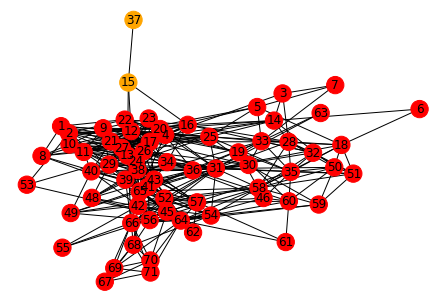

Graph for 3 communities.
Modularity score of the communities: 0.00489004466052349


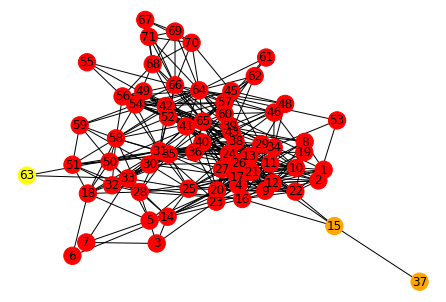

Graph for 4 communities.
Modularity score of the communities: 0.07145997826646822


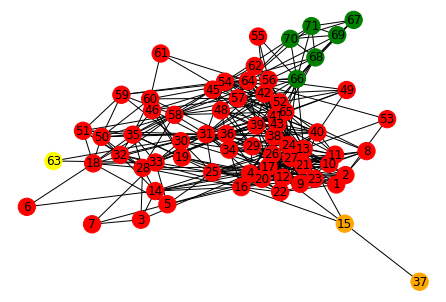

Graph for 5 communities.
Modularity score of the communities: 0.07341034289985618


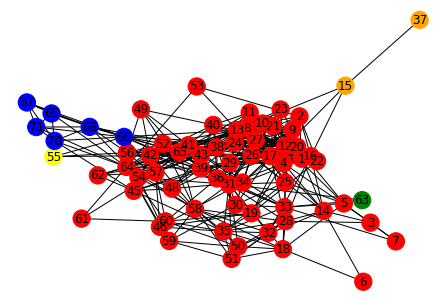

In [11]:
g = obtainDivisions(lazega, 4)

for subdiv in g:
    paintGraph(lazega, subdiv)

### Communities obtained attribute-based

In [12]:
def createAttributeGraph(attribute, lazega):
    att_array = get_att_array(lazega,attribute) # we get array with attribute values
    att_dict= nx.get_node_attributes(lazega,attribute) # dict where each node : value
    att_communities = []
    for c in np.unique(att_array): # 0 , 1 , 2
        comm_c =[]
        for n in lazega.nodes():
            if att_dict[n]==c:
                comm_c.append(n) # we append all nodes whose value is c
        att_communities.append(comm_c) # att_communities = [ [0s], [1s], [2s] ]
    return att_communities

-= For attribute Office =-
Graph for 3 communities.
Modularity score of the communities: 0.19672929190143276


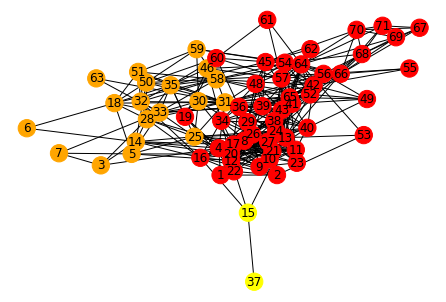

-= For attribute Practice =-
Graph for 2 communities.
Modularity score of the communities: 0.08067788518916338


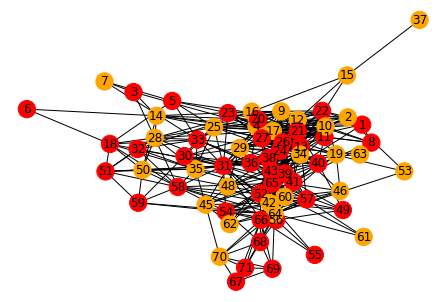

-= For attribute Age =-
Graph for 33 communities.
Modularity score of the communities: -0.005926470311116134


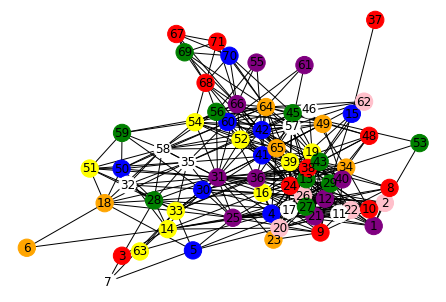

-= For attribute Seniority =-
Graph for 27 communities.
Modularity score of the communities: 0.06420499871231965


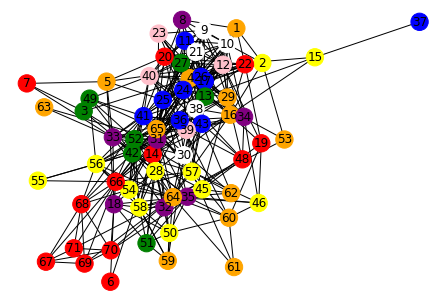

-= For attribute Gender =-
Graph for 2 communities.
Modularity score of the communities: 0.07026023705881251


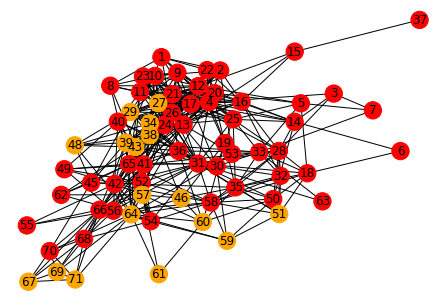

-= For attribute Status =-
Graph for 2 communities.
Modularity score of the communities: 0.25532502936539336


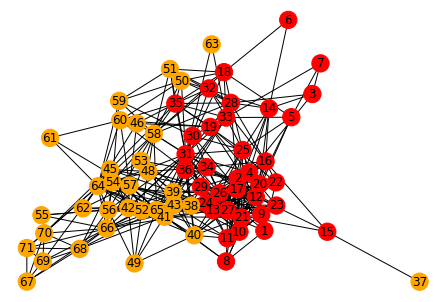

In [13]:
attributes = ['Office', 'Practice', 'Age', 'Seniority', 'Gender', 'Status']


for attr in attributes:
    print("-= For attribute {} =-".format(attr))
    atts = createAttributeGraph(attr, lazega)
    paintGraph(lazega, atts)

As we can see, attribute based graphs work much better, not only do they obtain a better modularity score, especially with Office and Status, but also visually we seem to obtain groups of equivalent size.

---------

We now move on to the model-based community detection method. A "cheap" way to obtain embeddings of the nodes into 2-dimensional space is to use a graph layout algorithm. Networkx provides a few layout algorithms that return a dictionary of nodes:coordinates :

In [14]:
embedding = nx.kamada_kawai_layout(lazega) # position using path length cost function
embedding2 = nx.circular_layout(lazega) # position nodes in a circle.
embedding3 = nx.spring_layout(lazega) # edges are close to eachother but nodes are far apart

**Task 2:** Calculate the log-likelihood of the lazega graph based on embeddings provided by different layout algorithms (cf. slide 31). Which layout provides the best "explanation" for the observed edges based on our probabilistic model?

In [15]:
def euclideanDistance(p1, p2): # estimates euclidean distance between p1 and p2.
    tot = 0
    if len(p1) != len(p2):
        return "Error: lengths have to be the same."
    for i in range(len(p1)):
        tot += (p1[i] - p2[i])**2
    return math.sqrt(tot)

In [16]:
def getPairsOfNodes(nodes): # [1, 2, 3] -> [(1,2), (1,3), (2,3)]. We obtain all pairs of nodes
    res = []
    for i in nodes:
        for j in nodes:
            if (((j,i) not in res) and (i != j)):
                res.append((i, j))
    return res            

In [17]:
def obtainLogLikelihood(lazega, embedding, a, b): # idea is to maximize log-likelihood.
    edges = list(lazega.edges())
    nodes = lazega.nodes()
    pairsOfNodes = getPairsOfNodes(nodes)
    tot = 0
    for pair in pairsOfNodes:
        if pair in edges:
            tot += (a - b) * euclideanDistance(embedding[pair[0]], embedding[pair[1]]) - math.log(1 + math.exp((a - b) * euclideanDistance(embedding[pair[0]], embedding[pair[1]])))
        else:
            tot += - math.log(1 + math.exp((a - b) * euclideanDistance(embedding[pair[0]], embedding[pair[1]])))
    return tot

In [18]:
print("Kamada-kawai layout: {}".format(obtainLogLikelihood(lazega, embedding, .7, .3)))
print("Circular layout: {}".format(obtainLogLikelihood(lazega, embedding2, .7, .3)))
print("Spring layout: {}".format(obtainLogLikelihood(lazega, embedding3, .7, .3)))
# alpha and beta should be found using e.g logistic regression and using pairwise distances
# z_i - z_j as input features

Kamada-kawai layout: -1913.469690044234
Circular layout: -2173.0374985545895
Spring layout: -1832.6153579346496


Given that we want our log-likelihood to be as close to 0 as possible, it seems the spring layout is the layout that best fits to our graph data.

Given coordinates for the nodes, we can now fit a Gaussian mixture model to these points. First we need to reshape our data again a little bit to fit the requirements of the next method in our pipeline: we turn the dictionary of positions into a standard array, where the first column contains the node identifier (not really needed in the following, but good to have it for possible checks along the road):

In [19]:
pos_array=np.zeros((len(embedding),3))

for i,k in enumerate(embedding.keys()):
    pos_array[i,0]=int(k)
    pos_array[i,1:3]=embedding[k]
    

In [20]:
pos_array[0:3]

array([[ 1.        ,  0.3334081 ,  0.45459248],
       [ 2.        ,  0.23041638,  0.52949984],
       [ 4.        , -0.09466405,  0.29465532]])

We use the sklearn.mixture.GaussianMixture class. Apart from specifying the number of mixture components, we can also restrict the covariance matrices in different ways. For example, covariance_type='tied' means that in the learned model all components have the same covariance matrix (which is the same restriction that we saw in the LDA classification model). 

In [21]:
gmm=GaussianMixture(n_components=2,covariance_type='tied').fit(pos_array[:,1:3])

Since we are doing clustering, we are using the 'predict' function of the learned mixture models on the training points:

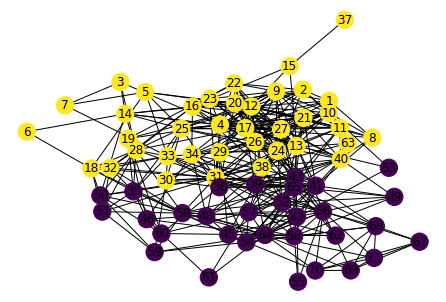

In [22]:
clusters=gmm.predict(pos_array[:,1:3])
nx.draw(lazega,pos=embedding,with_labels=True,node_color=clusters)

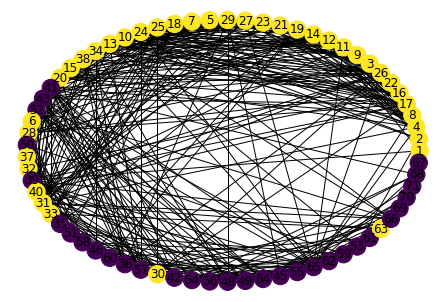

In [23]:
clusters=gmm.predict(pos_array[:,1:3])
nx.draw(lazega,pos=embedding2,with_labels=True,node_color=clusters)

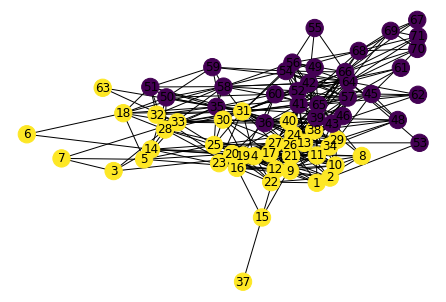

In [24]:
clusters=gmm.predict(pos_array[:,1:3])
nx.draw(lazega,pos=embedding3,with_labels=True,node_color=clusters)

**Task 3:** Compare the modularity scores obtained by Gaussian mixture models with n_components = 2,3,4,5 and embeddings obtained from different layout methods. How does the modularity score relate to the likelihood scores computed in Task 2 -- do embeddings with higher likelihood score lead to clusterings with higher modularity? 

In [25]:
def gaussMixModel(lazega, n_comps, embedding, show_graph = True, DIM = 3):
    
    pos_array=np.zeros((len(embedding),DIM))
    for i,k in enumerate(embedding.keys()):
        pos_array[i,0]=int(k)
        pos_array[i,1:DIM]=embedding[k]
    
    gmm=GaussianMixture(n_components=n_comps,covariance_type='tied').fit(pos_array[:,1:DIM])
    clusters=gmm.predict(pos_array[:,1:DIM])
    clustered_nodes = []
    nodes = pos_array[:, 0]
    unique_vals = list(set(clusters))
    for i in range(len(unique_vals)):
        res = []
        for l in range(len(clusters)):
            if unique_vals[i] == clusters[l]:
                res.append(str(int(nodes[l])))
        clustered_nodes.append(res)
    if (show_graph):
        nx.draw(lazega,pos=embedding,with_labels=True,node_color=clusters)
    print("Modularity score of the communities: {}".format(modularity(lazega,clustered_nodes))) 
    plt.show()

Community graph when looking for 2 communities using Kamada kawai layout.
Modularity score of the communities: 0.2643168070552321


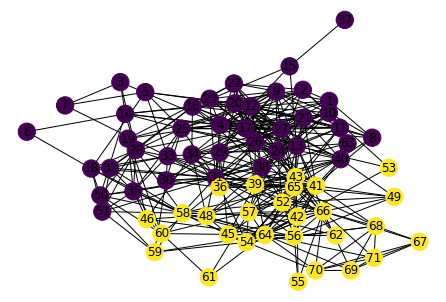

Community graph when looking for 3 communities using Kamada kawai layout.
Modularity score of the communities: 0.35168434871640253


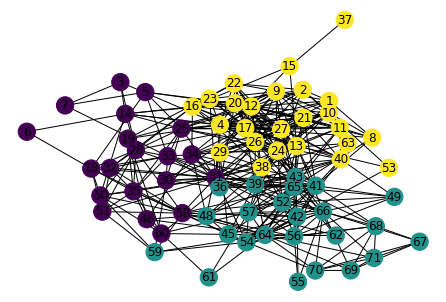

Community graph when looking for 4 communities using Kamada kawai layout.
Modularity score of the communities: 0.2979598118102273


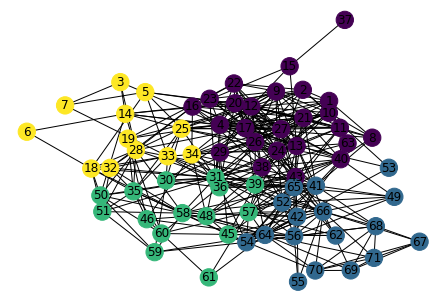

Community graph when looking for 5 communities using Kamada kawai layout.
Modularity score of the communities: 0.239891709222932


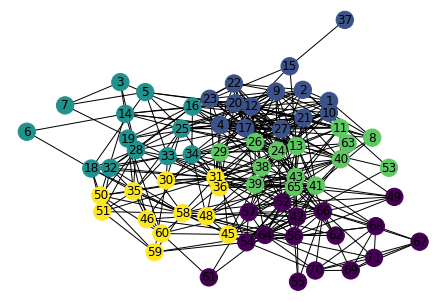

Community graph when looking for 2 communities using circular layout.
Modularity score of the communities: 0.19420732281832398


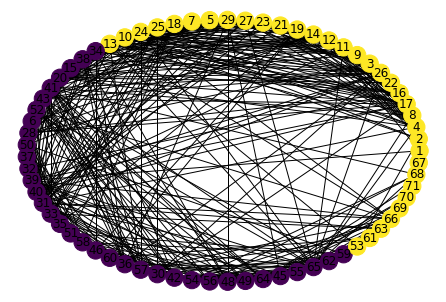

Community graph when looking for 3 communities using circular layout.
Modularity score of the communities: 0.1871093774536592


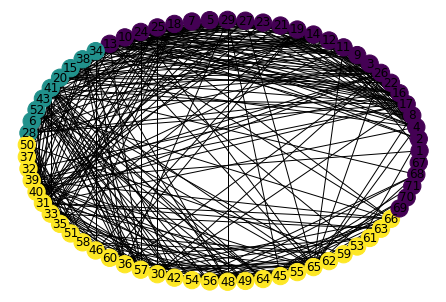

Community graph when looking for 4 communities using circular layout.
Modularity score of the communities: 0.12676741980263945


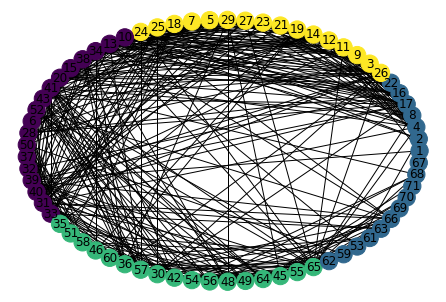

Community graph when looking for 5 communities using circular layout.
Modularity score of the communities: 0.12853562477622626


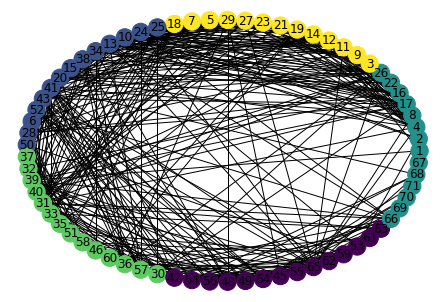

Community graph when looking for 2 communities using spring layout.
Modularity score of the communities: 0.21142769203711032


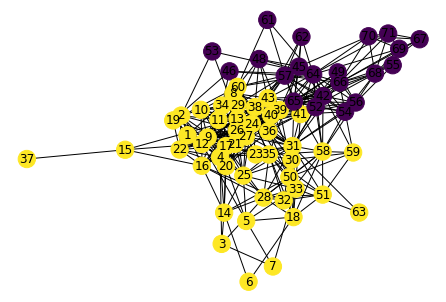

Community graph when looking for 3 communities using spring layout.
Modularity score of the communities: 0.22953059340079524


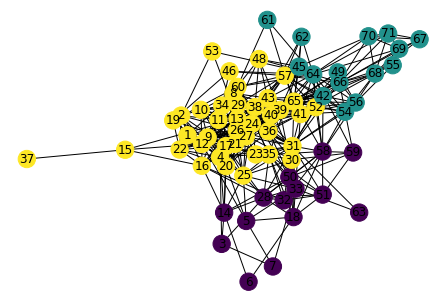

Community graph when looking for 4 communities using spring layout.
Modularity score of the communities: 0.17389023938291842


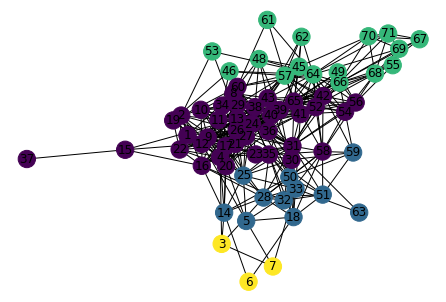

Community graph when looking for 5 communities using spring layout.
Modularity score of the communities: 0.20628325198962316


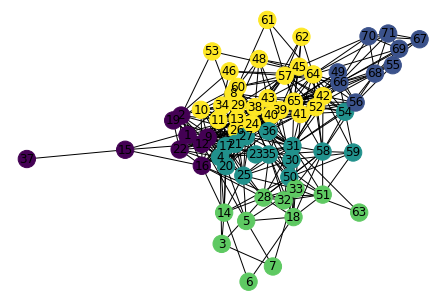

In [26]:
layout_options = [nx.kamada_kawai_layout(lazega), nx.circular_layout(lazega), nx.spring_layout(lazega)]
names = ["Kamada kawai", "circular", "spring"]
j = 0
for l in layout_options:
    for i in range(2,6):
        print("Community graph when looking for {} communities using {} layout.".format(i, names[j]))
        gaussMixModel(lazega, i, l)
    j += 1

**Order from better to worse as for modularity**: Spring -> Kamada kawai -> Circular

It does relate to the log likelihood! Spring has the lowest log likelihood and we can see that it obtains the best modularity scores! Then it happens with kamada and then circular layout.

Using coordinates calculated by layout algorithms for our graph mixture model is of course not what one is supposed to do. The "proper" approach is to learn vectors z_i by maximizing the log-likelihood function. A full implementation of such an approach is outside the scope of what we can do in this self study. However, with relatively little effort we can take some steps in this direction. 

We make use of the fact that we already have a very special vector representation of the nodes in form of the rows of the adjacency matrix, which we can access as follows:


In [27]:
am=nx.adjacency_matrix(lazega) # adjacency matrix which specify that nodes i and j have an edge between them or not
idx=35
print("The adjacency vector for node {} in a sparse vector representation is \n{}".format(list(lazega.nodes)[idx],am[idx,:]))
print("The same in a standard dense vector representation: \n{}".format(am[idx,:].todense()))

The adjacency vector for node 37 in a sparse vector representation is 
  (0, 27)	1
The same in a standard dense vector representation: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


**Beware:** the indices of nodes in our current matrices do not coincide with the node labels we see e.g.  when plotting the graphs. 

Using the dense vector representations, we can use the np.linalg.norm function to compute the Euclidean distance between two adjacency vectors:

In [28]:
idx0=0
idx1=3
print("The distance between the adjacency vectors of nodes {} and {} is {}".format(list(lazega.nodes)[idx0],\
                                                                              list(lazega.nodes)[idx1],\
                                                                                  np.linalg.norm(am[idx0,:].todense()-am[idx1,:].todense())))

The distance between the adjacency vectors of nodes 1 and 8 is 3.3166247903554


The **distance between adjacency vectors** suggests how different nodes i and j are regarding their connections.

**Task 4:** Construct the 69x69 distance matrix between the nodes of the lazega graph based on the Euclidean distance between the adjacency vectors. Use this matrix and the multidimensional scaling implementation sklearn.manifold.MDS to construct 2-dimensional vector representations for the nodes. Fit again a Gaussian mixture model to these new representations, and compare the modularity score you get now to what you got in the earlier tasks. With this approach we are not limited to 2-dimensional vector representations: how do things change when you use multidimensional scaling with a target dimension of 3 or 4 instead?

In [29]:
def distanceMatrix(lazega):
    am=nx.adjacency_matrix(lazega) # adjacency matrix which specify that nodes i and j have an edge between them or not
    nodes = list(lazega.nodes)
    fullRes = []
    for i in range(len(nodes)):
        res = []
        for j in range(len(nodes)):
            res.append(np.linalg.norm(am[i,:].todense()-am[j,:].todense()))
        fullRes.append(res)
    return fullRes

In [30]:
def ObtainMDS(lazega, n_components):
    embedding = MDS(n_components=n_components, normalized_stress='auto')
    X_transformed = embedding.fit_transform(distanceMatrix(lazega))
    X_transformed.shape
    
    nodes = list(lazega.nodes())
    pos_dict = {}

    for i in range(len(nodes)):
        pos_dict[nodes[i]] = X_transformed[i]
    return pos_dict

In [37]:
N = 5
for i in range(2, N+1):
    for j in range(2,N+1):
        print("Using representation with {} dimensions, fix Gaussian Mixture Model with {} components".format(i,j))
        pos_dict = ObtainMDS(lazega, i)
        gaussMixModel(lazega, j, pos_dict,False, i+1)

Using representation with 2 dimensions, fix Gaussian Mixture Model with 2 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.2163397214841615
Using representation with 2 dimensions, fix Gaussian Mixture Model with 3 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.23859460681779635
Using representation with 2 dimensions, fix Gaussian Mixture Model with 4 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.120467208120552
Using representation with 2 dimensions, fix Gaussian Mixture Model with 5 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.12568702457899134
Using representation with 3 dimensions, fix Gaussian Mixture Model with 2 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.13645642929378585
Using representation with 3 dimensions, fix Gaussian Mixture Model with 3 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.280767708745548
Using representation with 3 dimensions, fix Gaussian Mixture Model with 4 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.11623984773964988
Using representation with 3 dimensions, fix Gaussian Mixture Model with 5 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.16645938153654813
Using representation with 4 dimensions, fix Gaussian Mixture Model with 2 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.12027248572559215
Using representation with 4 dimensions, fix Gaussian Mixture Model with 3 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.2807677087455481
Using representation with 4 dimensions, fix Gaussian Mixture Model with 4 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.2690341141073234
Using representation with 4 dimensions, fix Gaussian Mixture Model with 5 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.15882751992763866
Using representation with 5 dimensions, fix Gaussian Mixture Model with 2 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.14450600184672205
Using representation with 5 dimensions, fix Gaussian Mixture Model with 3 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.2730133604688413
Using representation with 5 dimensions, fix Gaussian Mixture Model with 4 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.26812959717589707
Using representation with 5 dimensions, fix Gaussian Mixture Model with 5 components


C:\Users\inigo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


Modularity score of the communities: 0.19725064541051876


### 